<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#demograhpy" data-toc-modified-id="demograhpy-1">demograhpy</a></span></li><li><span><a href="#paybacks" data-toc-modified-id="paybacks-2">paybacks</a></span><ul class="toc-item"><li><span><a href="#ECA" data-toc-modified-id="ECA-2.1">ECA</a></span></li><li><span><a href="#SERAFE" data-toc-modified-id="SERAFE-2.2">SERAFE</a></span></li></ul></li><li><span><a href="#tax-incomes" data-toc-modified-id="tax-incomes-3">tax incomes</a></span><ul class="toc-item"><li><span><a href="#cars_fuels" data-toc-modified-id="cars_fuels-3.1">cars_fuels</a></span></li><li><span><a href="#circulation" data-toc-modified-id="circulation-3.2">circulation</a></span></li><li><span><a href="#computation-of-tax" data-toc-modified-id="computation-of-tax-3.3">computation of tax</a></span></li></ul></li></ul></div>

In [17]:
# modules for plotting
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_context('notebook')
%config InlineBackend.figure_format = 'retina'

# module to save space
import gc

import numpy as np

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


As we start from *Switzerland*, and in particular canton **Vaud** as case study > all costs are in  **CHF/year**

Also, instead of start thinking from how to _get_ money, we think how to give back the tax first

# demograhpy   

basic demographic data, relevant for our case study (Switzerland)

(these N are a taken just as a starting point -- relative to past statistics) -- sources:


[population total](https://www.atlas.bfs.admin.ch/maps/13/fr/14459_72_71_70/23029.html)   
[households N](http://www.scris.vd.ch/Data_Dir/ElementsDir/8235/2/F/Portraits-des-familles.pdf)

In [2]:
pop_vaud_2019 = 799145

households_vaud_2013 = 323064

# paybacks

we need to return that money immediately to citizen, to 
- build trust in the carbon reform 
- create a sustainable reform

the first principle here is avoid at the beginning too large differences between residents, in particular among those ones living in countryside/city, where there is low/high public transport frequency 

Therefore, here the idea is to start payback on tax/public services that everybody needs (both in villages and cities)

## ECA

Given the increasing evidence of the relation between *pollution > increase frequency of sever weather events*, it makes sense that costs from natural disasters are payed more and more by who pollutes

in canton **Vaud**: one idea would be to stop paying the basic fee for the [ECA](https://www.eca-vaud.ch)   
(the public intervention service/insurance against natural disasters)

In [4]:
eca_basic_fee = 20

eca_basic_tot = eca_basic_fee * households_vaud_2013
eca_basic_tot

6461280

## SERAFE

it might seems counter-intuitive, but paying the public news/radio-TV services might be also interesting, as this is a tax _every household_ has to pay, no matter where you live (city/countriside)

In [5]:
serafe_fee = 365

serafe_tot = serafe_fee * households_vaud_2013
serafe_tot

117918360

# tax incomes

the general idea is to tax fossil fuels usage

statistics on mobility: 
(mind that in EN sometimes you don't find everything - better in FR/DE)

https://www.bfs.admin.ch/bfs/fr/home/statistiques/mobilite-transports.html 


[average daily road traffic](https://www.bfs.admin.ch/bfs/fr/home/statistiques/mobilite-transports/infrastructures-transport-vehicules/comptage-suisse-circulation-route.html)

[costs-funding](https://www.bfs.admin.ch/bfs/en/home/statistics/mobility-transport/costs-funding.html)

[N vehicles](https://www.bfs.admin.ch/bfs/fr/home/statistiques/mobilite-transports/infrastructures-transport-vehicules/vehicules/vehicules-routiers-parc-taux-motorisation.html)

again, we consider only data for canton VAUD

[cars efficiency in CH](https://www.eltis.org/discover/case-studies/energy-consumption-label-passenger-cars-switzerland)

## cars_fuels

[petrol data](https://www.globalpetrolprices.com/Switzerland/gasoline_prices/)

In [8]:
# gasoline_per_litre = 1.4 

n_cars_vaud = 416941 
n_electric = 2298 

from this stats > [av. cost per vehicle](https://www.bfs.admin.ch/bfs/fr/home/statistiques/mobilite-transports/couts-financement/route-mobilite-douce.html)

In [9]:
## all are YEARLY averaged estimates -- by the OFSP

cost_vehicle = 7620 # av. annual cost / vehi. 
cost_vehicle_km = 0.6 # av. annual cost / (vehi.*km) 
km_per_vehicle = cost_vehicle / cost_vehicle_km
km_per_vehicle

12700.0

In [14]:
litres_km = 0.06 # to play safe, we consider 6 l/100km -- better to underestimate incomes, than over- :D

(for the time being we don't need this fun, as the problem is linear)

In [15]:
def fuel_tax_tot(tax_per_litre):
    
    '''
    enter tax in CHF -- for now 
    '''
    return tax_per_litre * litres_km * km_per_vehicle * n_cars_vaud

## circulation

(for the time being we don't need this fun, as the problem is linear)

In [31]:
def circ_tax_tot(circ_tax):
    
    return n_cars_vaud * circ_tax

## computation of tax

for the time being, we can keep it to a simple linear problem:

`Ax=b`, where 
`x`: unitary taxes (_increments_) 

clearly, we need (N-1) _more_ constraints -- with N = number of tax income sources

one way, would be to set the ratio among total incomes -- how much do we want each source to contribute?

In [59]:
circ_to_fuel_ratio = 0.1  # just a N for now

total_paybacks = eca_basic_tot + serafe_tot
b = np.array([0, total_paybacks])

coeff_matrix = np.array(
    [[n_cars_vaud, -circ_to_fuel_ratio * litres_km * km_per_vehicle * n_cars_vaud],
     [n_cars_vaud, litres_km * km_per_vehicle * n_cars_vaud]])
print(coeff_matrix)

circ_tax, fuel_tax = np.linalg.solve(coeff_matrix, b)

print('\n\nassuming a circ_to_fuel_ratio:', circ_to_fuel_ratio)
print('(extra) circulation tax:', np.round(circ_tax, 3), 'CHF/(y*veh)')
print('(extra) fuel tax:', np.round(fuel_tax, 3), 'CHF/l')

[[ 4.16941000e+05 -3.17709042e+07]
 [ 4.16941000e+05  3.17709042e+08]]


assuming a circ_to_fuel_ratio: 0.1
(extra) circulation tax: 27.12 CHF/(y*veh)
(extra) fuel tax: 0.356 CHF/l


graphical representation

In [55]:
def ratio_eq(fuel_tax):
    return (b[0] - coeff_matrix[0, 1] * fuel_tax) / coeff_matrix[0,0]

def main_eq(fuel_tax):
    return (b[1] - coeff_matrix[1, 1] * fuel_tax) / coeff_matrix[1,0]

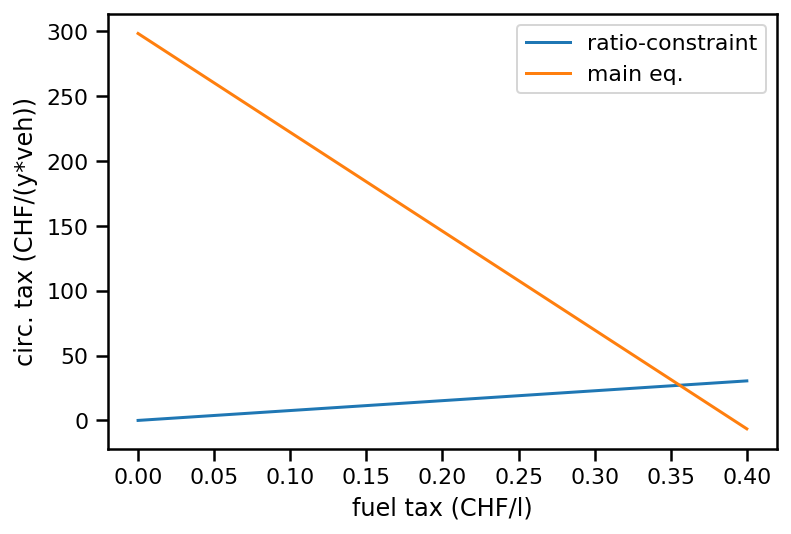

In [58]:
x_fuel_tax = np.linspace(0, 0.4)

plt.plot(x_fuel_tax, ratio_eq(x_fuel_tax), label='ratio-constraint')
plt.plot(x_fuel_tax, main_eq(x_fuel_tax), label='main eq.')
plt.legend()

plt.xlabel('fuel tax (CHF/l)')
plt.ylabel('circ. tax (CHF/(y*veh))');